# Logistic Regression

## Derivation

## Logistic Regression: Derivation and Formula

### Model:

We model the probability of the positive class as:

$$
P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b)
$$

where the sigmoid function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### Likelihood:

The likelihood of parameters given data \(\{(\mathbf{x}_i, y_i)\}\) is:

$$
L(\mathbf{w}, b) = \prod_{i=1}^m \sigma(z_i)^{y_i} (1 - \sigma(z_i))^{1 - y_i}
$$

with \( z_i = \mathbf{w}^T \mathbf{x}_i + b \).

---

### Log-Likelihood:

Taking log:

$$
\ell(\mathbf{w}, b) = \sum_{i=1}^m \left[ y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right]
$$

---

### Loss Function (Binary Cross-Entropy):

Minimize negative log-likelihood:

$$
J(\mathbf{w}, b) = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$

where \( \hat{y}_i = \sigma(z_i) \).

---

### Gradients:

The gradients of the loss are:

$$
\nabla_{\mathbf{w}} J = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i) \mathbf{x}_i
$$

$$
\nabla_b J = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)
$$

---

### Update Rules:

Parameters updated by gradient descent as:

$$
\mathbf{w} := \mathbf{w} - \alpha \nabla_{\mathbf{w}} J
$$

$$
b := b - \alpha \nabla_b J
$$

where \( \alpha \) is the learning rate.

# Code

In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.W = None
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0

        for _ in range(self.n_iters):
            linear_model = X @ self.W + self.b
            y_pred = self.sigmoid(linear_model)
            error = y_pred - y

            # Compute gradients
            dw = (1 / m) * (X.T @ error)
            db = (1 / m) * np.sum(error)

            # Update weights
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict_prob(self, X):
        linear_model = X @ self.W + self.b
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probs = self.predict_prob(X)
        return (probs >= threshold).astype(int)

In [2]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])


# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


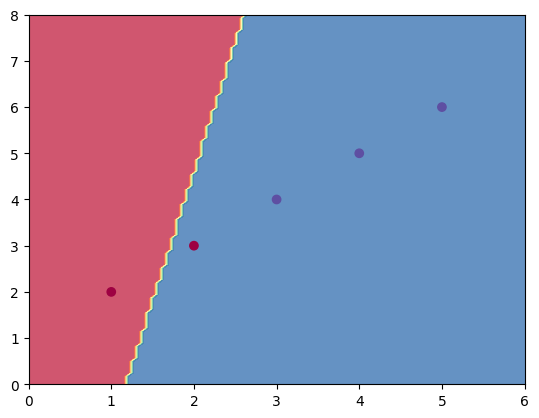

In [6]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

# PyTorch implementation

In [3]:
import torch

class LogisticRegressionTorch:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        m, n = X.shape
        self.weights = torch.zeros((n, 1), requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True)

        for _ in range(self.n_iters):
            # Linear model: z = Xw + b
            z = X @ self.weights + self.bias
            y_pred = self.sigmoid(z)

            # Binary cross-entropy loss
            loss = -(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8)).mean()

            # Backpropagation
            loss.backward()

            # Gradient descent step (no grad tracking here)
            with torch.no_grad():
                self.weights -= self.learning_rate * self.weights.grad
                self.bias -= self.learning_rate * self.bias.grad

                # Zero gradients after update
                self.weights.grad.zero_()
                self.bias.grad.zero_()

    def predict_prob(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        z = X @ self.weights + self.bias
        return self.sigmoid(z).detach().numpy()

    def predict(self, X, threshold=0.5):
        probs = self.predict_prob(X)
        return (probs >= threshold).astype(int)

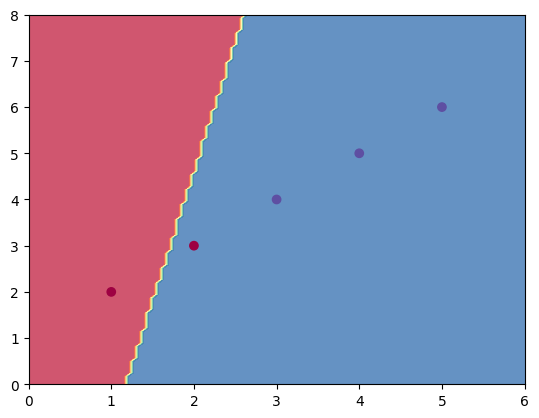

In [5]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

# [Code Using Libraries]

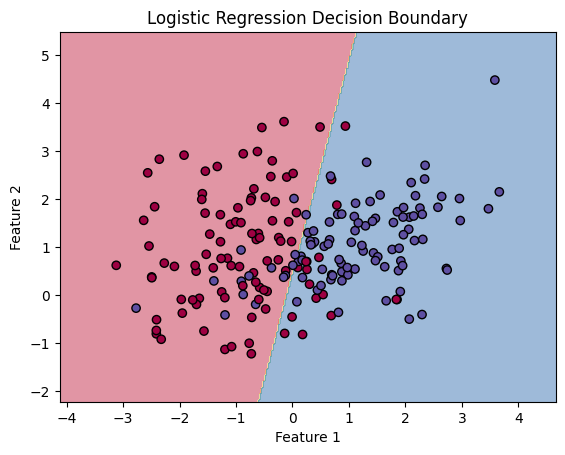

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate 2D binary classification data
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Train logistic regression
lr = LogisticRegression()
lr.fit(X, y)

# Create a grid of points covering the feature space
x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300)
x2 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
xx, yy = np.meshgrid(x1, x2)

# Predict the class for each point in the grid
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()